# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Utility Functions

## Metrics

In [2]:
def get_mse(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

def get_rmse(y_real, y_pred):
    return np.sqrt(get_mse(y_real, y_pred))

## Standardization

In [5]:
class StandardScaler:
    def __init__(self):
        self.fitted = False

    def fit_transform(self, data):      
        self.mean = data.mean(axis=0)
        self.std = data.std(axis=0)
        self.fitted = True

        scaled_data = (data - self.mean) / self.std
        return scaled_data
    
    def transform(self, data):
        if not self.fitted:
            raise Exception('Scaler not fitted!')

        scaled_data = (data - self.mean) / self.std
        return scaled_data

    def inverse_transform(self, scaled_data):
        if not self.fitted:
            raise Exception('Scaler not fitted!')
        
        original_data = (scaled_data * self.std) + self.mean
        return original_data


## Min-max feature scaling

In [6]:
class MinMaxScaler:
    def __init__(self):
        self.fitted = False

    def fit_transform(self, data):      
        self.maximum = data.max(axis=0)
        self.minimum = data.min(axis=0)
        self.fitted = True

        scaled_data =  (data - self.minimum) / (self.maximum - self.minimum)
        return scaled_data
    
    def transform(self, data):
        if not self.fitted:
            raise Exception('Scaler not fitted!')

        scaled_data =  (data - self.minimum) / (self.maximum - self.minimum)
        return scaled_data

    def inverse_transform(self, scaled_data):
        if not self.fitted:
            raise Exception('Scaler not fitted!')
        
        original_data = (self.maximum - self.minimum) * scaled_data + self.minimum
        return original_data

# Question 1

In [7]:
data = np.genfromtxt('./artificial1d.csv', delimiter=',')
data[:5,:]

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695]])

## Item a) 
Show the model parameters and the MSE (Mean Squared Error) obtained by OLS (Ordinary Least Squares) method. Plot the result line over the data.

In [239]:
def linear_regression_ols(X, y):
    anti_non_inv_matrix = (10 ** -8) * np.eye(X.shape[1], X.shape[1])
    w_hat = (np.linalg.pinv(X.T @ X + anti_non_inv_matrix) @ X.T) @ y
    return w_hat.reshape(-1, 1)

In [240]:
X = np.hstack([np.ones((len(data), 1)), data[:,[0]]])
y = data[:,[1]]

In [243]:
w = linear_regression_ols(X, y)

print('Coeficients of Linear Regression Using Ordinary Least Squares Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i, 0]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i, 0]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))


Coeficients of Linear Regression Using Ordinary Least Squares Method:
Intercept:	0.067618
X(1):    	1.574865

#--- Metrics ---#
MSE: 0.2134009013293699
RMSE: 0.461953354062258


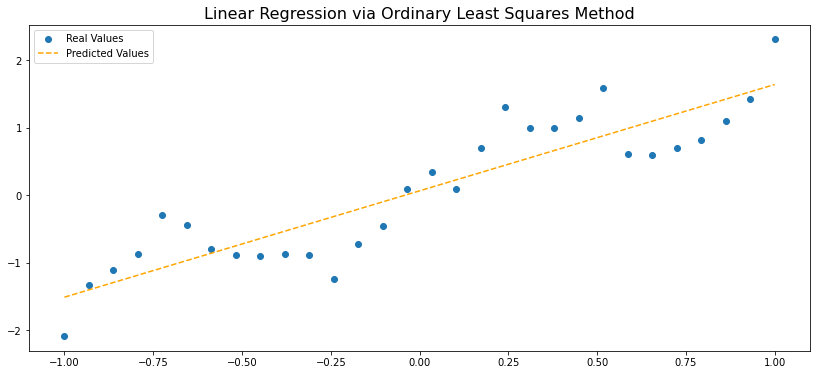

In [244]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear Regression via Ordinary Least Squares Method', fontsize=16)
plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

## Item b) 
Show the model parameters, the MSE and the learning curve obtained by Gradient Descent method. Plot the result line over the data.

In [273]:
def linear_regression_gd(X, y, alfa=0.1, n_iterations=1000):

    np.random.seed(123142)
    w = np.random.uniform(0, 1, X.shape[1]).reshape(-1, 1)
    count = 0
    learning_curve = []
    while count < n_iterations:

        y_hat = X @ w
        e = (y - y_hat) 

        # print((w + (1/len(y))))
        w = w + ((1/len(y)) * alfa * (e.T @ X)).reshape(-1, 1)

        y_pred = (X @ w)
        learning_curve.append(get_mse(y, y_pred))

        count+=1

    # print(w * X_std + X_mean)
    return np.array([w]).reshape(-1, 1), learning_curve

In [274]:
X = np.hstack([np.ones((data.shape[0], 1)), data[:, [0]]])
y = data[:, [1]]

In [275]:
w, learning_curve_gd = linear_regression_gd(X, y, alfa=0.1, n_iterations=200)

print('Coeficients of Linear Regression Using Gradient Descent Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i, 0]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i, 0]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))

Coeficients of Linear Regression Using Gradient Descent Method:
Intercept:	0.067618
X(1):    	1.574075

#--- Metrics ---#
MSE: 0.21340112369149283
RMSE: 0.4619535947381434


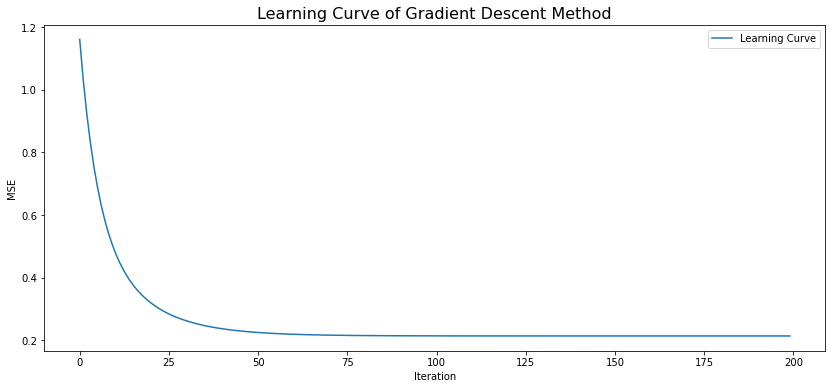

In [276]:
fig = plt.figure(figsize=(14, 6))
plt.title('Learning Curve of Gradient Descent Method', fontsize=16)
# plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(learning_curve_gd, label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('MSE')
# plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

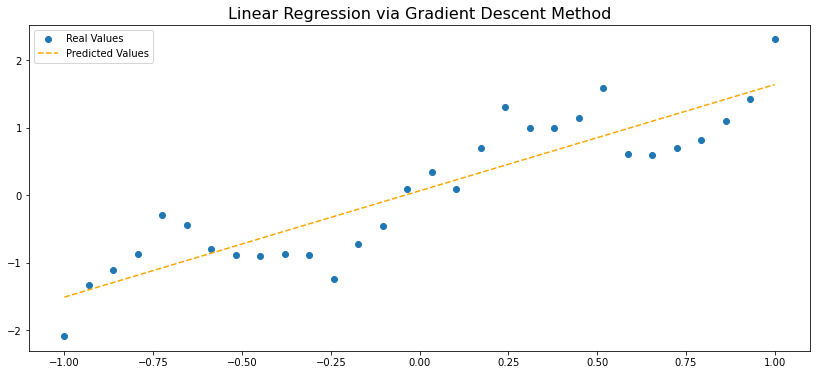

In [277]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear Regression via Gradient Descent Method', fontsize=16)
plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

## Item c) 
Show the model parameters, the MSE and the learning curve obtained by Stochastic Gradient Descent method. Plot the result line over the data.

In [278]:
def linear_regression_sgd(X, y, alfa=0.1, n_iterations=1000):

    np.random.seed(123142)
    w = np.random.uniform(0, 1, X.shape[1]).reshape(-1, 1)
    random_indexes = np.random.randint(0, X.shape[0], n_iterations)

    count = 0
    learning_curve = []
    while count < n_iterations:
        
        random_X = X[[random_indexes[count]]]
        random_y = y[[random_indexes[count]]]

        y_hat = random_X @ w
        e = (random_y - y_hat)
        w = w + (alfa * (e.T * random_X)).reshape(-1, 1)

        y_pred = (X @ w)
        learning_curve.append(get_mse(y, y_pred))

        count+=1

    return np.array(w), learning_curve

In [279]:
X = np.hstack([np.ones((data.shape[0], 1)), data[:, [0]]])
y = data[:, [1]]

In [280]:
w, learning_curve_sgd = linear_regression_sgd(X, y, alfa=0.1, n_iterations=200)

print('Coeficients of Linear Regression Using Stochastic Gradient Descent Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i, 0]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i, 0]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))

Coeficients of Linear Regression Using Stochastic Gradient Descent Method:
Intercept:	0.039748
X(1):    	1.622922

#--- Metrics ---#
MSE: 0.2150005713210871
RMSE: 0.46368154084574803


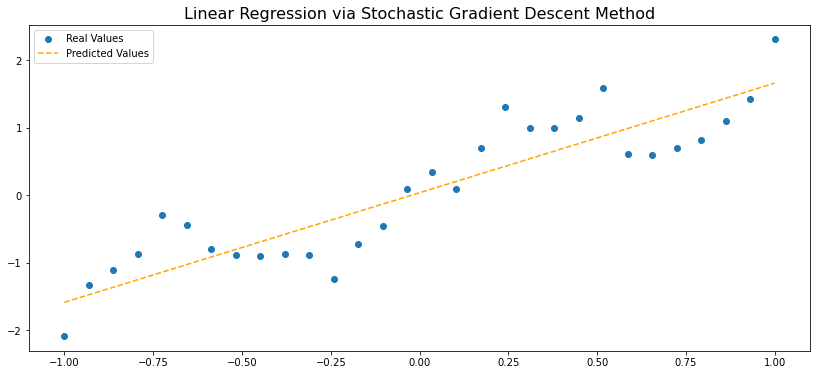

In [281]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear Regression via Stochastic Gradient Descent Method', fontsize=16)
plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

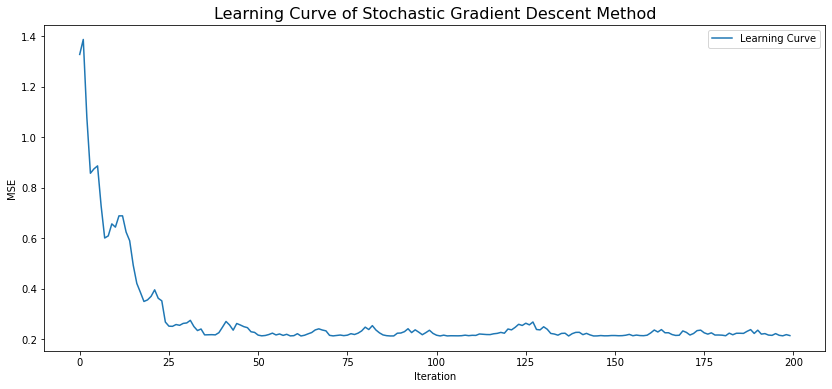

In [282]:
fig = plt.figure(figsize=(14, 6))
plt.title('Learning Curve of Stochastic Gradient Descent Method', fontsize=16)
plt.plot(learning_curve_sgd, label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Learning Curves Compare

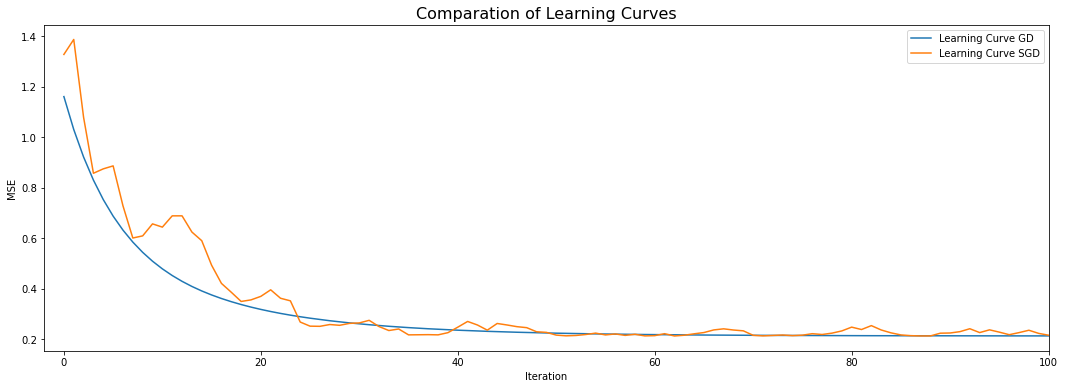

In [283]:
fig = plt.figure(figsize=(18, 6))
plt.title('Comparation of Learning Curves', fontsize=16)
plt.plot(learning_curve_gd, label='Learning Curve GD')
plt.plot(learning_curve_sgd, label='Learning Curve SGD')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.xlim(-2, 100)
plt.legend()
plt.show()

# Question 2

In [353]:
california_data = np.genfromtxt('./california.csv', delimiter=',')
california_data = california_data[:, [0, -1]]
california_data

array([[4.1685, 2.175 ],
       [2.8194, 0.811 ],
       [2.425 , 0.849 ],
       ...,
       [6.4755, 4.058 ],
       [3.5353, 1.647 ],
       [1.2545, 0.455 ]])

In [354]:
def train_test_split(data, train_size_perc, random_seed=64852):
    N = data.shape[0]
    train_size = int(train_size_perc * N)

    indexes = np.arange(0, N, 1)

    np.random.seed(random_seed)
    train_idx = np.random.choice(indexes, train_size, replace=False)
    test_idx = np.delete(indexes, train_idx)

    train_data = data[train_idx]
    test_data = data[test_idx]

    X_train = train_data[:,:-1]
    y_train = train_data[:,[-1]]

    X_test = test_data[:,:-1]
    y_test = test_data[:,[-1]]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(california_data, 0.8)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (4000, 1)
y_train shape: (4000, 1)
X_test shape: (1000, 1)
y_test shape: (1000, 1)


In [355]:
X_scaler = MinMaxScaler()
X_train_norm = X_scaler.fit_transform(X_train)

y_scaler = MinMaxScaler()
y_train_norm = y_scaler.fit_transform(y_train)

X_test_norm = X_scaler.transform(X_test)
y_test_norm = y_scaler.transform(y_test)

In [356]:
def insert_polynomial_features(X, polynomial_degree):

    X_poly = np.hstack([np.ones((X.shape[0], 1)), X])

    if polynomial_degree > 1:
        for i in range(2, polynomial_degree+1):
            X_poly = np.hstack([X_poly, X**i])
        
    return X_poly



#--- Polynomial Regression - Degree 1 ---#
[[0.        ]
 [0.00248962]
 [0.00248962]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]
MSE Train: 1.1388742998193582
MSE Test: 1.1541021363575952


#--- Polynomial Regression - Degree 2 ---#
[[0.        ]
 [0.00248962]
 [0.00248962]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]
MSE Train: 1.1397990544079604
MSE Test: 1.159307404977225


#--- Polynomial Regression - Degree 3 ---#
[[0.        ]
 [0.00248962]
 [0.00248962]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]
MSE Train: 1.1388714267998656
MSE Test: 1.1587089218904143


#--- Polynomial Regression - Degree 4 ---#
[[0.        ]
 [0.00248962]
 [0.00248962]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]
MSE Train: 1.1383965043870106
MSE Test: 1.1550459030601266


#--- Polynomial Regression - Degree 5 ---#
[[0.        ]
 [0.00248962]
 [0.00248962]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]
MSE Train: 1.138587465057084
MSE Test: 1.1523967215451048


#--- Polynomial Regression - D

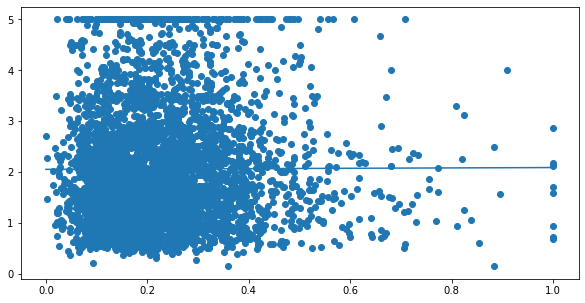

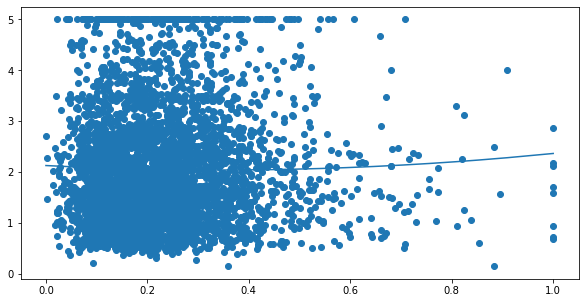

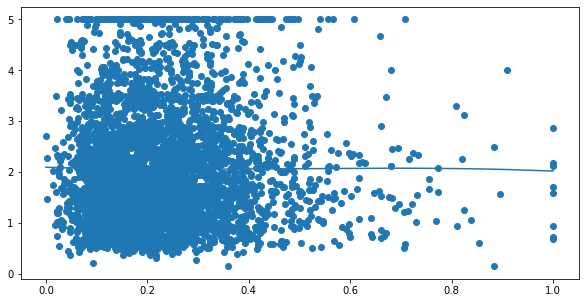

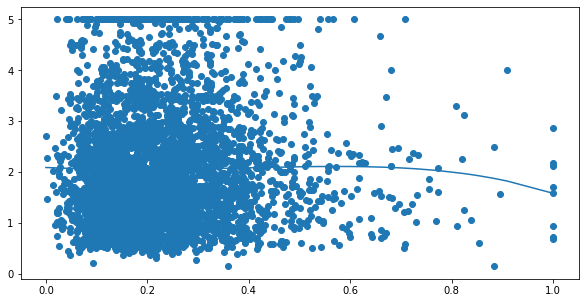

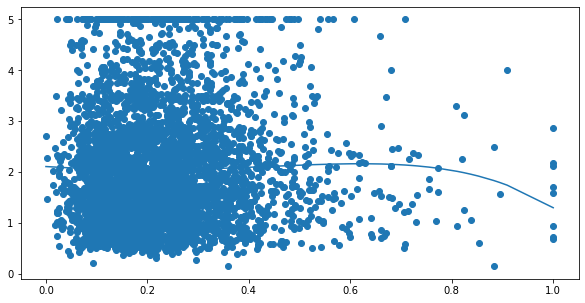

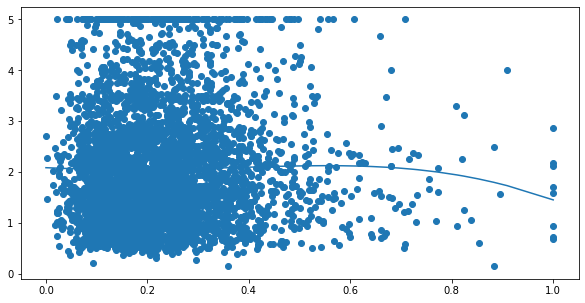

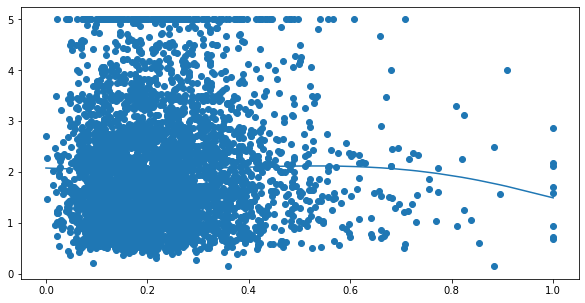

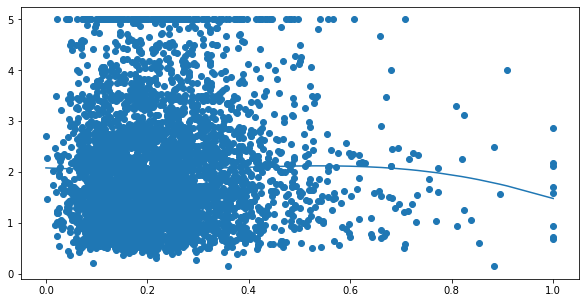

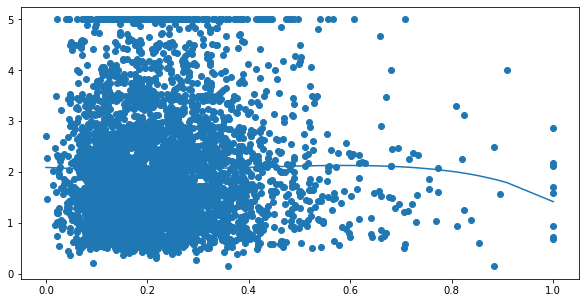

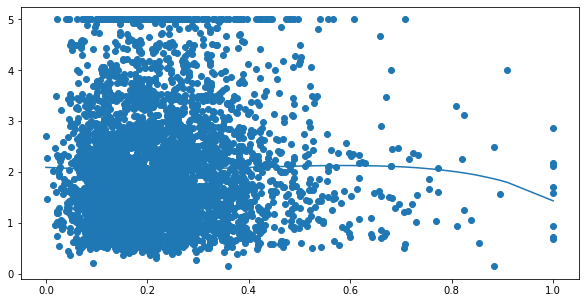

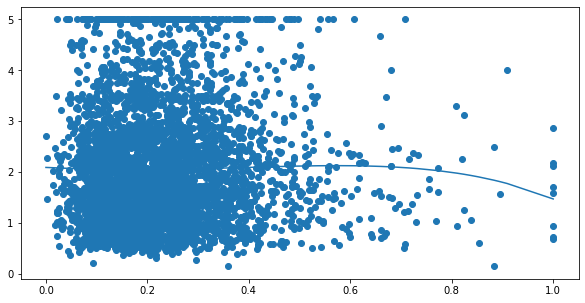

In [357]:

rmse_train_list = []
rmse_test_list = []

for i in range(11):
    print(f'\n\n#--- Polynomial Regression - Degree {i+1} ---#')
    X_train_norm[:, 0] = np.sort(X_train_norm[:, 0])
    print(X_train_norm)
    X_train_norm_poly = insert_polynomial_features(X_train_norm, i+1)
    # w = linear_regression_ols(X_train_norm_poly, y_train_norm).reshape(-1, 1)
    w, line = linear_regression_gd(X_train_norm_poly, y_train_norm, alfa=0.7, n_iterations=1000)#.reshape(-1, 1)

    # print(X_train_norm_poly.shape)
    # print(w.shape)

    y_train_norm_pred = X_train_norm_poly @ w
    y_train_pred = y_scaler.inverse_transform(y_train_norm_pred)
    
    rmse_train = get_rmse(y_train, y_train_pred)
    rmse_train_list.append([i+1, rmse_train])
    print('MSE Train:', rmse_train)

    X_test_norm_poly = insert_polynomial_features(X_test_norm, i+1)
    y_test_norm_pred = X_test_norm_poly @ w
    y_test_pred = y_scaler.inverse_transform(y_test_norm_pred)

    # print(X_train_norm_poly)
    # print(y_train_pred)
    plt.figure(figsize=(10,5))
    plt.scatter(x=X_train_norm[:, 0], y=y_train)
    plt.plot(X_train_norm[:, 0], y_train_pred)
    # plt.plot(y_train_pred)

    rmse_test = get_rmse(y_test, y_test_pred)
    rmse_test_list.append([i+1, rmse_test])
    print('MSE Test:', rmse_test)

rmse_train_list = np.array(rmse_train_list)
rmse_test_list = np.array(rmse_test_list)

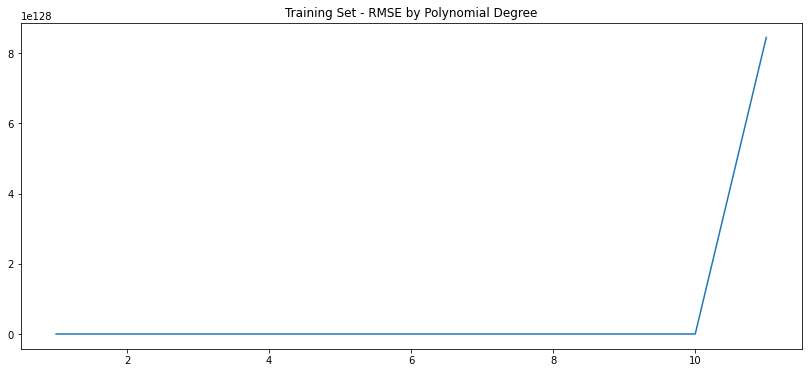

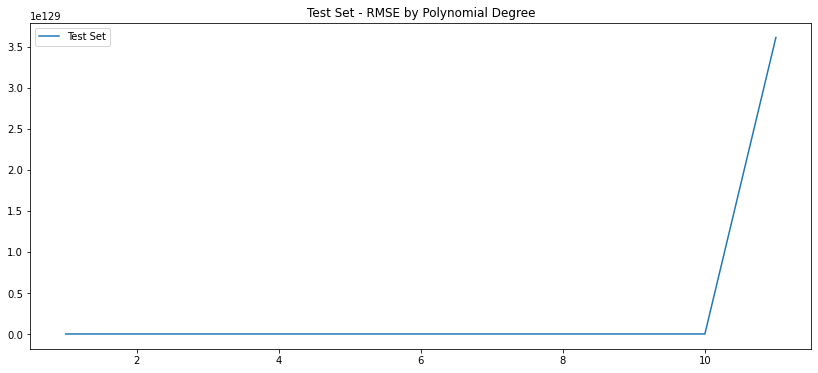

In [314]:
plt.figure(figsize=(14,6))
plt.title('Training Set - RMSE by Polynomial Degree')
plt.plot(rmse_train_list[:, 0], rmse_train_list[:, 1], label='Training Set')
# plt.ylim(0, 20)
plt.figure(figsize=(14,6))
plt.title('Test Set - RMSE by Polynomial Degree')
plt.plot(rmse_test_list[:, 0], rmse_test_list[:, 1], label='Test Set')
plt.legend()
plt.show()

## With L2 Regularization

In [265]:
def linear_regression_ols_reg(X, y, reg_lambda=0.001):
    reg_matrix = np.eye(X.shape[1], X.shape[1]) * reg_lambda
    reg_matrix[0, 0] = 0

    w_hat = (np.linalg.pinv(X.T @ X + reg_matrix) @ X.T) @ y
    return w_hat.ravel()

In [266]:
rmse_train_list = []
rmse_test_list = []

for i in range(11):
    print(f'\n\n#--- Polynomial Regression - Degree {i+1} ---#')
    X_train_norm_poly = insert_polynomial_features(X_train_norm, i+1)
    w = linear_regression_ols_reg(X_train_norm_poly, y_train_norm, 0.001).reshape(-1, 1)

    print(X_train_norm_poly.shape)
    print(w.shape)

    y_train_norm_pred = X_train_norm_poly @ w
    y_train_pred = y_scaler.inverse_transform(y_train_norm_pred)
    
    rmse_train = get_rmse(y_train, y_train_pred)
    rmse_train_list.append([i+1, rmse_train])
    print('MSE Train:', rmse_train)

    X_test_norm_poly = insert_polynomial_features(X_test_norm, i+1)
    y_test_norm_pred = X_test_norm_poly @ w
    y_test_pred = y_scaler.inverse_transform(y_test_norm_pred)

    rmse_test = get_rmse(y_test, y_test_pred)
    rmse_test_list.append([i+1, rmse_test])
    print('MSE Test:', rmse_test)

rmse_train_list = np.array(rmse_train_list)
rmse_test_list = np.array(rmse_test_list)



#--- Polynomial Regression - Degree 1 ---#
(4000, 9)
(9, 1)
MSE Train: 0.7177346425429513
MSE Test: 0.744217692357711


#--- Polynomial Regression - Degree 2 ---#
(4000, 17)
(17, 1)
MSE Train: 0.6777968604613881
MSE Test: 0.695343176306514


#--- Polynomial Regression - Degree 3 ---#
(4000, 25)
(25, 1)
MSE Train: 0.660686453968788
MSE Test: 1.6124879879894616


#--- Polynomial Regression - Degree 4 ---#
(4000, 33)
(33, 1)
MSE Train: 0.6542712126834034
MSE Test: 1.3135650913745487


#--- Polynomial Regression - Degree 5 ---#
(4000, 41)
(41, 1)
MSE Train: 0.6526545770085381
MSE Test: 5.357118417477315


#--- Polynomial Regression - Degree 6 ---#
(4000, 49)
(49, 1)
MSE Train: 0.6492710727388759
MSE Test: 26.149609313263735


#--- Polynomial Regression - Degree 7 ---#
(4000, 57)
(57, 1)
MSE Train: 0.6478316289438808
MSE Test: 85.14403741244416


#--- Polynomial Regression - Degree 8 ---#
(4000, 65)
(65, 1)
MSE Train: 0.6476128571462645
MSE Test: 212.11879942864573


#--- Polynomial Regre

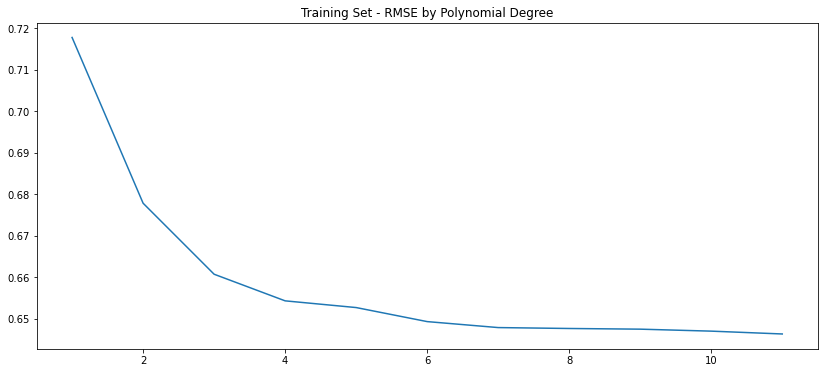

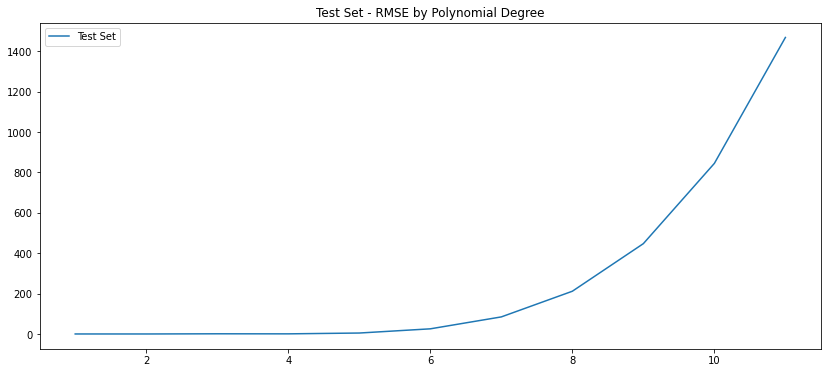

In [267]:
plt.figure(figsize=(14,6))
plt.title('Training Set - RMSE by Polynomial Degree')
plt.plot(rmse_train_list[:, 0], rmse_train_list[:, 1], label='Training Set')
# plt.ylim(0, 20)
plt.figure(figsize=(14,6))
plt.title('Test Set - RMSE by Polynomial Degree')
plt.plot(rmse_test_list[:, 0], rmse_test_list[:, 1], label='Test Set')
plt.legend()
plt.show()
# plt.ylim(0, 20)